**NAME** - _Padmanavan Kumar_

House Price Prediction
(Data Preprocessing and feature engineering)

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Handle missing values
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
threshold = 0.4  # Drop columns with more than 40% missing values
columns_to_drop = missing_values[missing_values / len(train_df) > threshold].index
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

# Fill missing values
numerical_cols = train_df.select_dtypes(include=['number']).columns.drop('SalePrice')
train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].median())
test_df[numerical_cols] = test_df[numerical_cols].fillna(train_df[numerical_cols].median())

categorical_cols = train_df.select_dtypes(include=['object']).columns
train_df[categorical_cols] = train_df[categorical_cols].fillna(train_df[categorical_cols].mode().iloc[0])
test_df[categorical_cols] = test_df[categorical_cols].fillna(train_df[categorical_cols].mode().iloc[0])

# One-hot encode categorical columns
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# Align train and test data
train_df, test_df = train_df.align(test_df, join='inner', axis=1)

# Add 'SalePrice' column back to train_df
train_df['SalePrice'] = pd.read_csv('train.csv')['SalePrice']

# Feature engineering
train_df['TotalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['TotalArea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

# Separate features and target variable from training data
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_df)

# Save preprocessed data
preprocessed_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
preprocessed_train_df['SalePrice'] = y_train.reset_index(drop=True)
preprocessed_test_df = pd.DataFrame(X_test_scaled, columns=test_df.columns)

preprocessed_train_df.to_csv('preprocessed_train.csv', index=False)
preprocessed_test_df.to_csv('preprocessed_test.csv', index=False)

# Load the preprocessed data
train_data = preprocessed_train_df
test_data = preprocessed_test_df

# Define the target variable
target_variable = 'SalePrice'

# Separate features and target variable in training data
X_train = train_data.drop(target_variable, axis=1)
y_train = train_data[target_variable]

# Separate features and target variable in testing data
X_test = test_data
y_test = pd.read_csv('train.csv')['SalePrice'][:len(X_test)]  # Adjust length of y_test

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Absolute Error: 78714.01509252914
Mean Squared Error: 11640263298.653227
R² Score: -0.8446317908336181


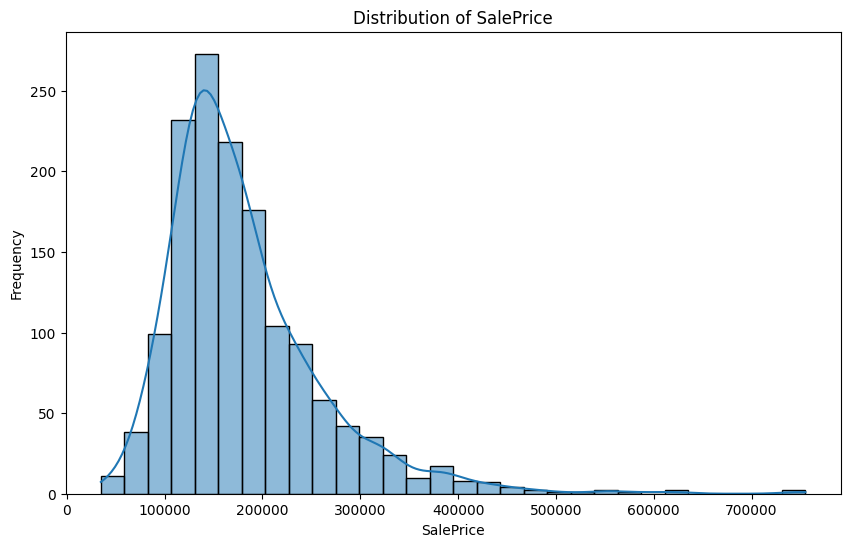

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed train data
preprocessed_train_df = pd.read_csv('preprocessed_train.csv')

# Plot the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(preprocessed_train_df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


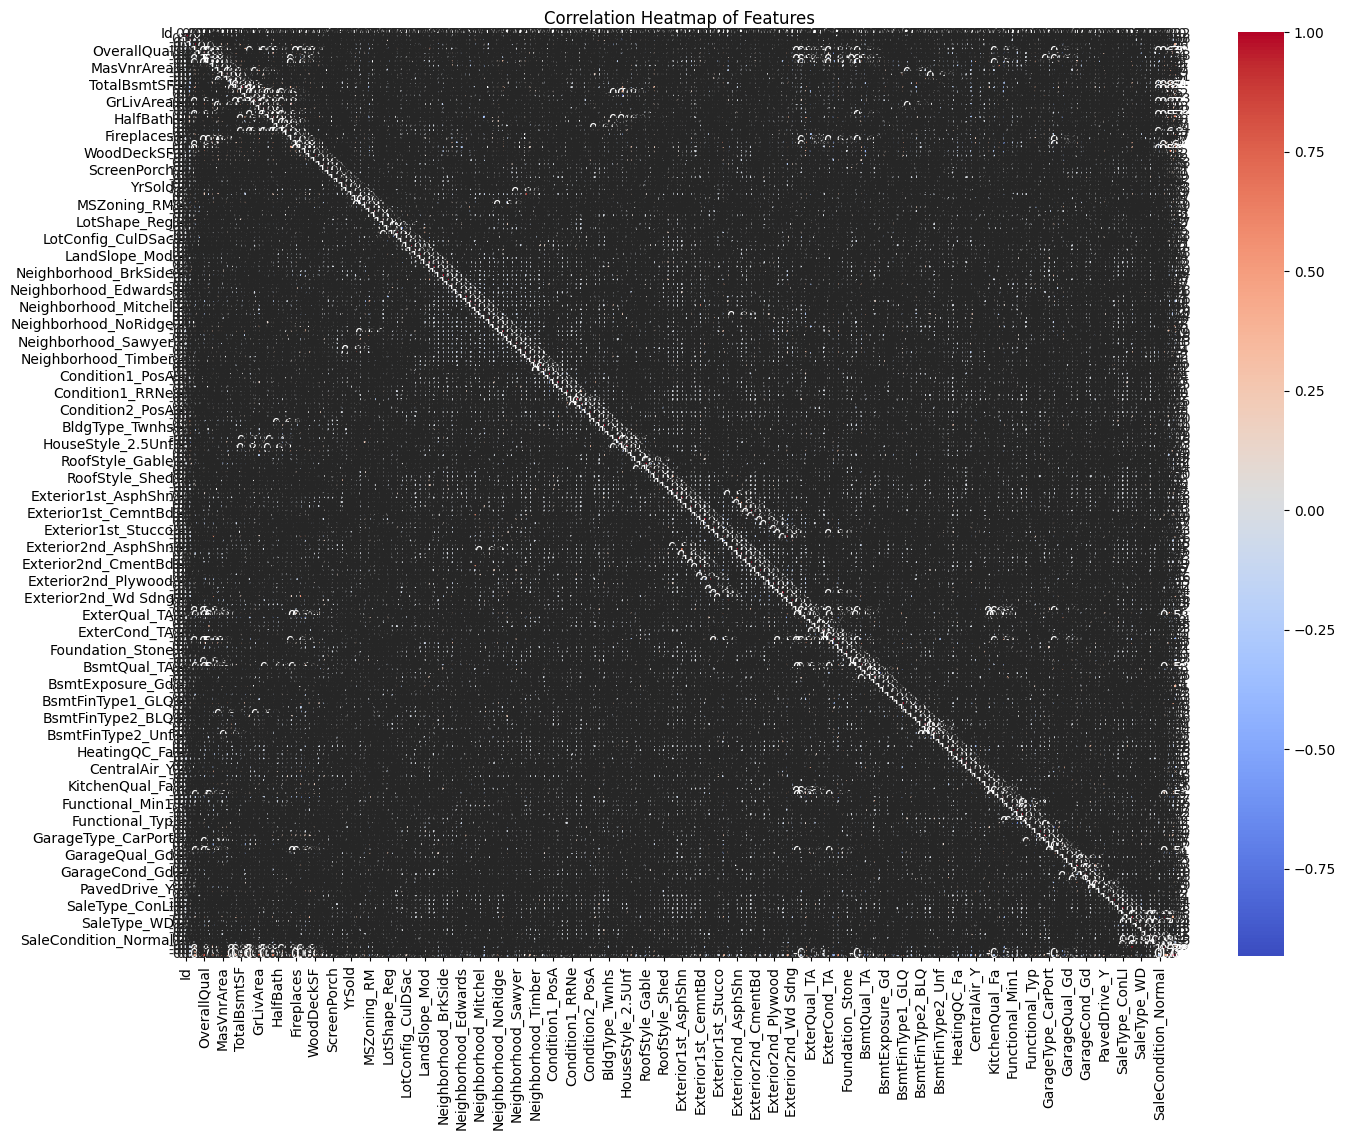

In [7]:
# Compute the correlation matrix
corr_matrix = preprocessed_train_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


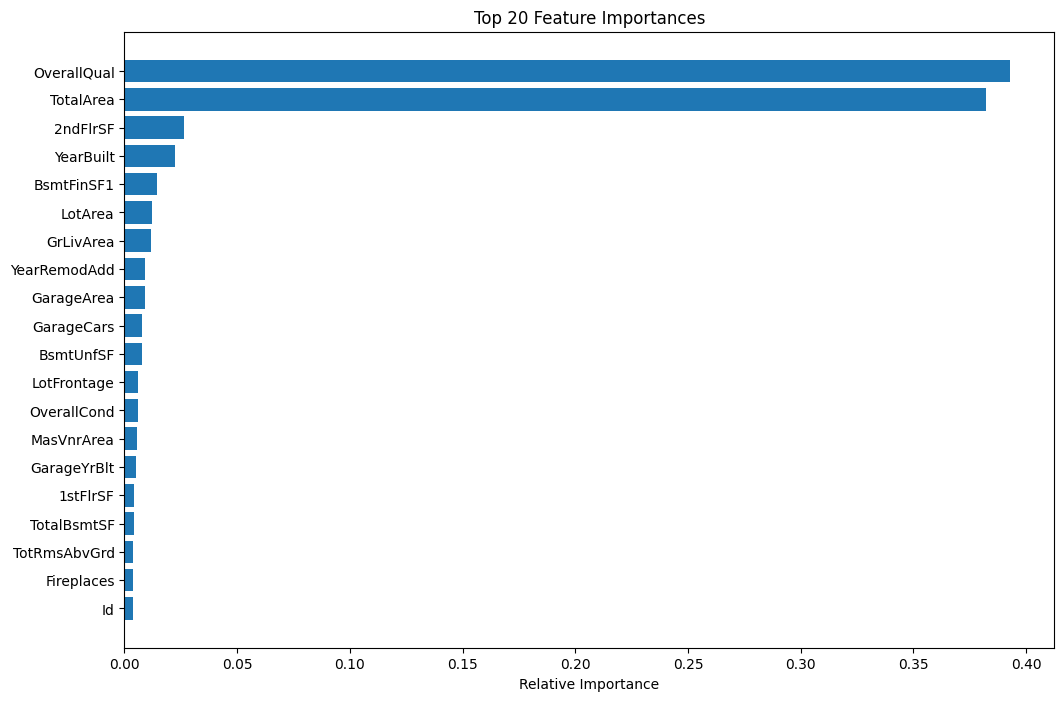

In [10]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train a Random Forest model (example)
X_train = preprocessed_train_df.drop('SalePrice', axis=1)
y_train = preprocessed_train_df['SalePrice']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features
features = X_train.columns[indices]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features)
plt.xlabel('Relative Importance')
plt.title('Top 20 Feature Importances')
plt.show()


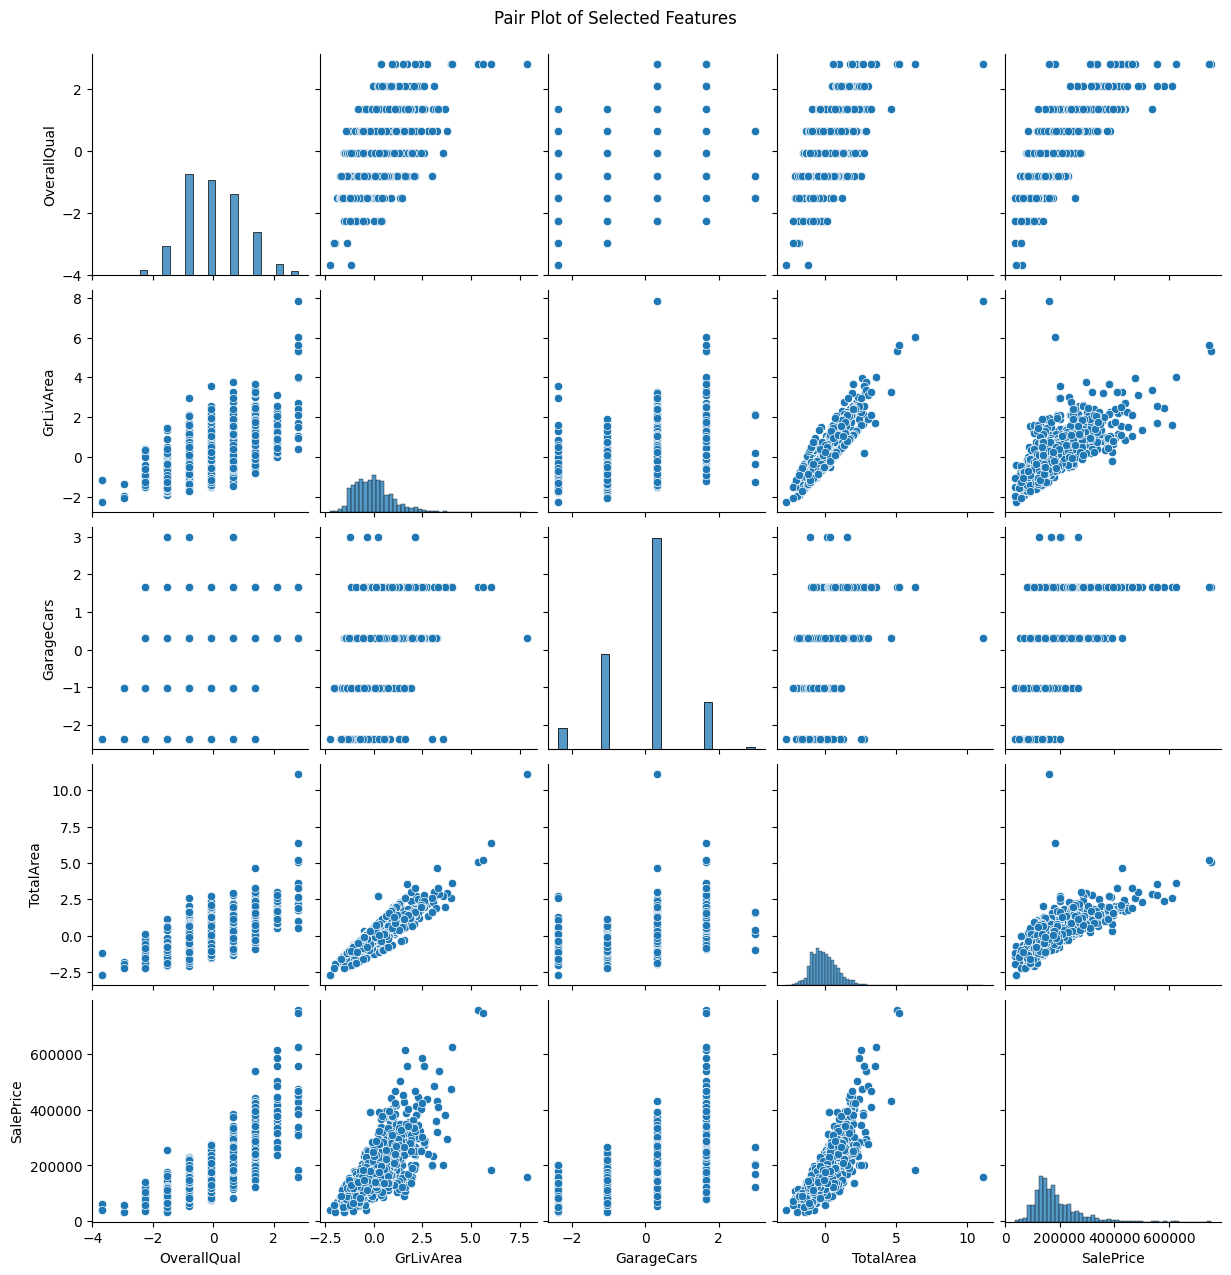

In [11]:
# Select a subset of features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalArea', 'SalePrice']
subset_df = preprocessed_train_df[selected_features]

# Plot pair plot
sns.pairplot(subset_df)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [4]:
import pandas as pd

# Load the preprocessed data
train_data = pd.read_csv('preprocessed_train.csv')
test_data = pd.read_csv('preprocessed_test.csv')

# Display the columns to detect the target variable
print(train_data.columns)
print(test_data.columns)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'TotalArea', 'SalePrice'],
      dtype='object', length=216)
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'TotalArea'],
      dtype='object', length=215)
